In [1]:
!wget clone https://www.dropbox.com/s/iuv35g1bdgbj9g7/phase-01-training.tar.gz

--2023-10-17 06:26:50--  http://clone/
Resolving clone (clone)... failed: Name or service not known.
wget: unable to resolve host address ‘clone’
--2023-10-17 06:26:50--  https://www.dropbox.com/s/iuv35g1bdgbj9g7/phase-01-training.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/iuv35g1bdgbj9g7/phase-01-training.tar.gz [following]
--2023-10-17 06:26:51--  https://www.dropbox.com/s/raw/iuv35g1bdgbj9g7/phase-01-training.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc39b303f8363436b6138e5fe477.dl.dropboxusercontent.com/cd/0/inline/CFx9k-23PhhQFV7Pyv8eb9L6yMCSC49W90MytH0H1tkDLS2VooE0SbMkZN6l3LreK11D8bsX-dqpFVaph88QMXwdK7pbG6pDpsBqpTcWvL4AYjBIEMy5tUIjijDbDue6n9s/file# [following]
--2023-10-17 06:26:51--  https://uc39b30

In [2]:


!apt-get install p7zip-full
!p7zip -d phase-01-training.tar.gz
!tar -xvf phase-01-training.tar.gz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/bin/p7zip: phase-01-training.tar.gz: unknown suffix
dataset-dist/
dataset-dist/phase-01/
dataset-dist/phase-01/training/
dataset-dist/phase-01/training/pristine/
dataset-dist/phase-01/training/pristine/2ab93ec08b4247332e2cee4379ad7e3c.png
dataset-dist/phase-01/training/pristine/0cd3336bcf6da64100be66bd613d493c.png
dataset-dist/phase-01/training/pristine/6f556b2583701fb343a5aca946dd71dd.png
dataset-dist/phase-01/training/pristine/4c15ec243178e6fea3390f17b1c0070c.png
dataset-dist/phase-01/training/pristine/0e53cd9ad8eeb7e42730e80624a3a0dc.png
dataset-dist/phase-01/training/pristine/5fb090a35bfa08776c41e854d6d274ca.png
dataset-dist/phase-01/training/pristine/1dd0c70dc732df85cae56497a7a8c28b.png
dataset-dist/phase-01/training/pristine/5b258f62113b68d48e0dfaf57cbfb0e7.png

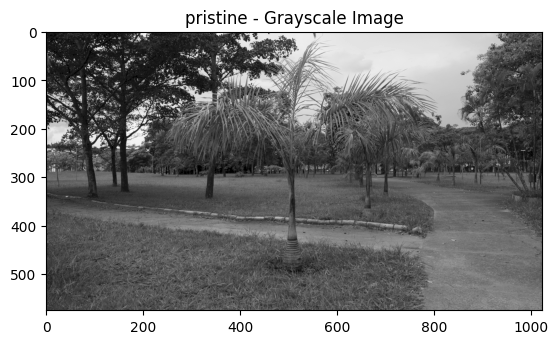

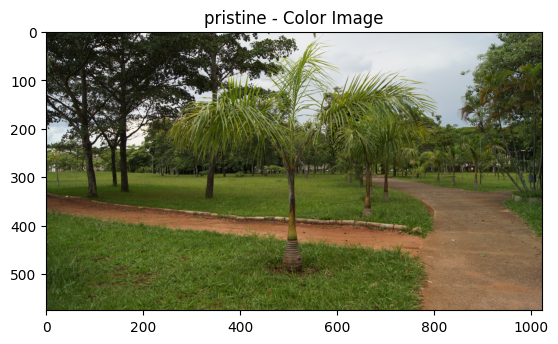

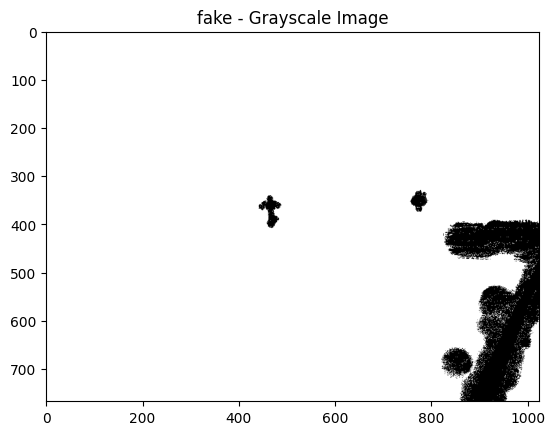

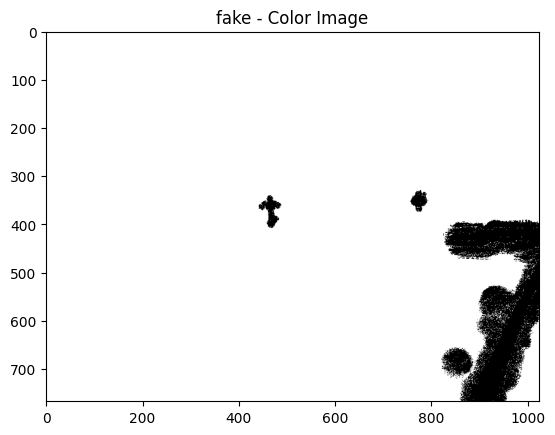

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

DATADIR = "/content/dataset-dist/phase-01/training"
CATEGORIES = ["pristine", "fake"]

CATEGORIES = ["pristine", "fake"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        c = cv2.imread(os.path.join(path, img))
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.title(f"{category} - Grayscale Image")
        plt.show()
        plt.imshow(cv2.cvtColor(c, cv2.COLOR_BGR2RGB))
        plt.title(f"{category} - Color Image")
        plt.show()
        break



In [6]:
import os
import cv2
from tqdm import tqdm
import random

DATADIR = "/content/dataset-dist/phase-01/training"
CATEGORIES = ["pristine", "fake"]
IMG_SIZE = 100  # Define the image size as per your requirements

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)  # Get the classification (0 for pristine, 1 for fake)

        for img in tqdm(os.listdir(path)):  # Iterate over each image in the 'pristine' and 'fake' categories
            try:
                img_path = os.path.join(path, img)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert the image to grayscale
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Resize the image

                training_data.append([img_array, class_num])  # Add the image and its class to the training data
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

create_training_data()
print(f"Total training data samples: {len(training_data)}")


 19%|█▊        | 168/901 [00:07<00:26, 28.01it/s]

Error processing /content/dataset-dist/phase-01/training/fake/.DS_Store: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 901/901 [00:44<00:00, 20.43it/s]

Total training data samples: 1950


In [ ]:
random.shuffle(training_data)   #shuffle data to solve overfitting
for sample in training_data[:1950]:
    print(sample[1])